# RHT example workflow
### by S. E. Clark


Imports. Note we are importing `rht` and `RHT_tools` from this repo.

In [35]:
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import rht, RHT_tools
%matplotlib inline

Load some test data. Let's use a fits version of a tesla coil image from <a href="https://commons.wikimedia.org/wiki/File:225W_Zeus_Tesla_coil_-_arcs2_(cropped).jpg">Wikimedia commons</a>. 

In [36]:
data_fn = "testdata/testim_tesla_small"
tesla_data = fits.getdata(data_fn+'.fits')#[1024, :, :]

In [37]:
tesla_data.shape

(300, 300)

Let's take a look at the original image.

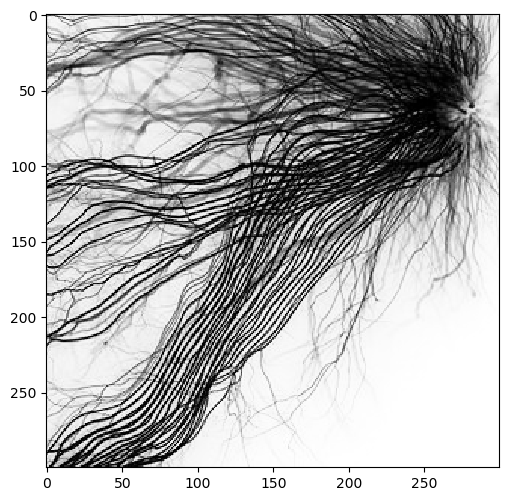

In [38]:
fig = plt.figure(figsize=(6,6))
plt.imshow(tesla_data, cmap="Greys")

Run the RHT! It's as simple as this. Note that depending on your setup, this may run quite slowly in a Jupyter notebook. The following should only take a few seconds from the command line. From the command line, simply do

~~~
python rht.py data_fn --wlen=21 --smr=2
~~~

Where wlen is the window length and smr is the unsharp mask smoothing radius. For details please refer to <a href="http://adsabs.harvard.edu/abs/2014ApJ...789...82C">the RHT paper</a>.

In [40]:
rht.main(data_fn+'.fits', smr=2, wlen=21)

**********************************************************************
             Fast Rolling Hough Transform by Susan Clark              
            Started for: testdata/testim_tesla_small.fits             
**********************************************************************
1/4:: Retrieving Data from: testdata/testim_tesla_small.fits
Finished Masking:                                                 0sec
2/4:: Size: 300x300, Wlen: 21, Smr: 2, Frac: 0.7, Standard (half-polar) RHT: True
3/4:: Running RHT...                                             36sec
4/4:: Successfully Saved Data As /Users/jegpeek/Repositories/RHT-fork/testdata/testim_tesla_small_xyt00.fits
**********************************************************************
               testdata/testim_tesla_small.fits: Passed               
                              Complete!                               
**********************************************************************


True

By default, the data are saved as a fits file of the same name, with "_xytNN" appended, where NN is the RHT run number.

In [41]:
rht_data_fn = data_fn+"_xyt00.fits"
rht_tesla = fits.getdata(rht_data_fn)

The backprojection is stored as the first hdu. This is total RHT linear intensity integrated over orientation. More prominent features in the backprojection indicate regions with greater total linear power.

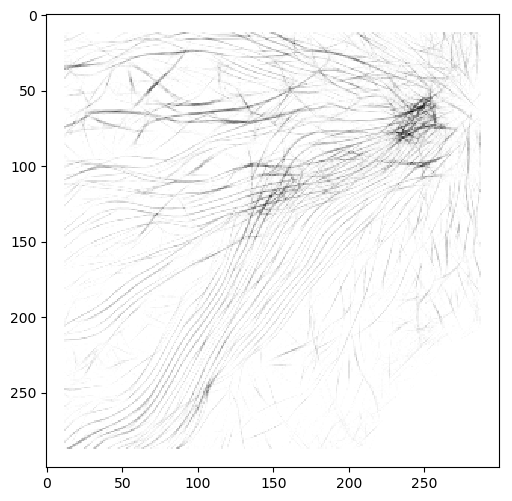

In [42]:
fig = plt.figure(figsize=(6,6))
plt.imshow(rht_tesla, cmap="Greys")

Some helper functions are provided in `RHT_tools.py`. Let's use them to grab the total RHT output (pixel indices and R(x, y, theta)) from the second header object.

In [43]:
ipoints, jpoints, hthets, naxis1, naxis2, wlen, smr, thresh = RHT_tools.get_RHT_data(rht_data_fn)

loading data from  testdata/testim_tesla_small_xyt00.fits


Just to demonstrate, let's grab a random point. We'll also get the array of theta bins using `RHT_tools`.

In [44]:
indx = 1000
ipoint_example = ipoints[indx]
jpoint_example = jpoints[indx]
hthets_example = hthets[indx]
thets_arr = RHT_tools.get_thets(wlen, save=False)

Plot the RHT spectrum at this random point.

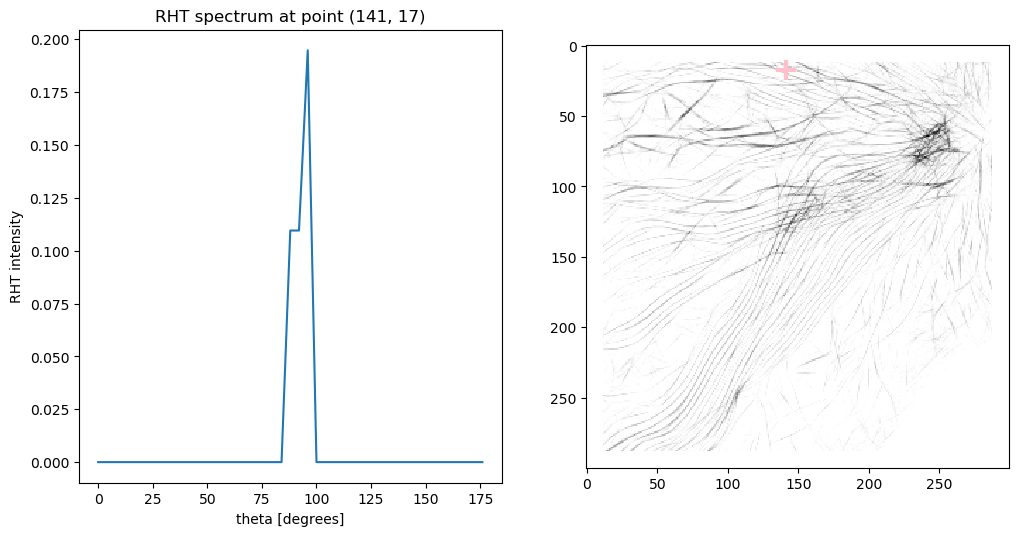

In [45]:
fig=plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(np.degrees(thets_arr), hthets_example)
ax1.set_xlabel("theta [degrees]")
ax1.set_ylabel("RHT intensity")
ax1.set_title("RHT spectrum at point ({}, {})".format(ipoint_example, jpoint_example))

ax2.imshow(rht_tesla, cmap="Greys")
ax2.plot(ipoint_example, jpoint_example, '+', color="pink", ms=15, mew=3)

Let's now plot all of the RHT spectra that lie in a given row in our image.

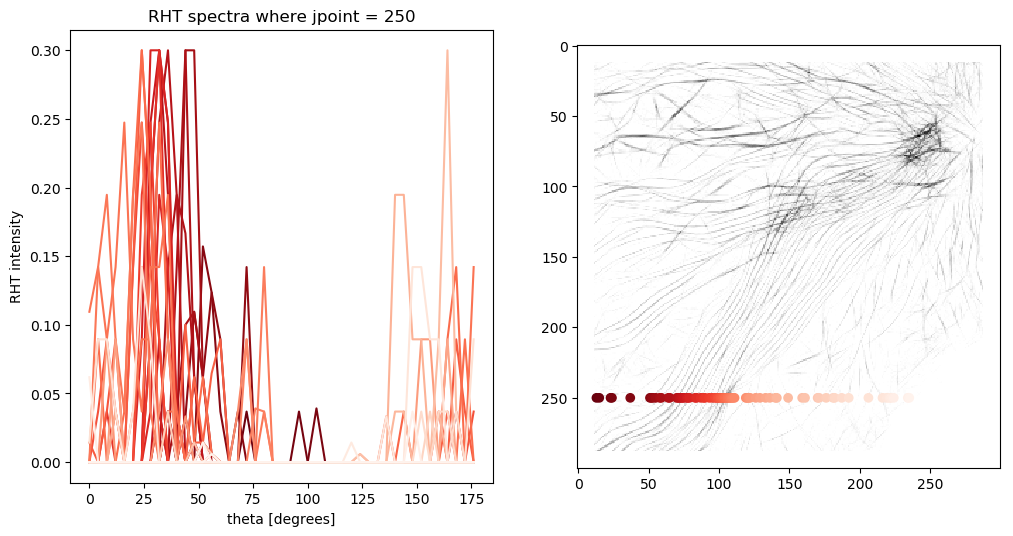

In [46]:
row_js = jpoints[np.where(jpoints == 250)]
row_is = ipoints[np.where(jpoints == 250)]
row_hthets = hthets[np.where(jpoints == 250)]

cmap = matplotlib.cm.get_cmap('Reds_r')

fig=plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for _i in range(len(row_js)):
    ax1.plot(np.degrees(thets_arr), row_hthets[_i, :,], color=cmap(_i*1./len(row_js)))
ax1.set_xlabel("theta [degrees]")
ax1.set_ylabel("RHT intensity")
ax1.set_title("RHT spectra where jpoint = {}".format(250))

ax2.imshow(rht_tesla, cmap="Greys")

plt.scatter(row_is, row_js, color=cmap(np.arange(len(row_js)*1.)/len(row_js)))